(1500, 100)

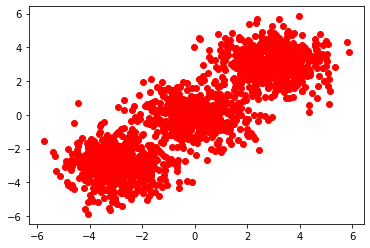

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import random
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from scipy.special import expit

n_clusters = 3

center = 3
dev = 1
n_points = 500
cluster = [None]*6

cluster[0] = np.random.normal(0, dev, (n_points,2))
cluster[1] = np.random.normal(center, dev, (n_points,2))
cluster[2] = np.random.normal(-center, dev, (n_points,2))
cluster[3] = np.concatenate((np.random.normal(-center, dev, (n_points,1)),np.random.normal(center, dev, (n_points,1))), axis=1)
cluster[4] = np.concatenate((np.random.normal(-2*center, dev, (n_points,1)),np.random.normal(0, dev, (n_points,1))), axis=1)
cluster[5] = np.concatenate((np.random.normal(center, dev, (n_points,1)),np.random.normal(-center, dev, (n_points,1))), axis=1)

X_train = np.column_stack((np.array([0]*n_points), cluster[0]))
for i in range(1, n_clusters):
    X_train = np.concatenate((X_train, np.column_stack((np.array([i]*n_points), cluster[i]))))

X_train = shuffle(X_train, random_state=0)
y_true = X_train[:,0].astype(int)
X_train = np.delete(X_train, 0, 1)

w = np.random.normal(0, 1, (X_train.shape[0], 10, 2))
u = np.random.normal(0, 1, (X_train.shape[0], 100, 10))

plt.scatter(X_train[:,0], X_train[:,1], c='red')

new_cl = []

for i in range(w.shape[0]):
    new_cl.append(expit(np.matmul(u[i], expit(np.matmul(w[i], X_train[i])))))
X_train = np.array(new_cl)
X_train.shape

In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F

device = torch.device("cpu")

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X_train):
        X = torch.from_numpy(X_train).float()
        X.requires_grad=True
        self.X = X.to(device)


    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index]
    
train_data = CustomDataset(X_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10*n_clusters)

In [3]:
k1 = 100
k2 = 50
k3 = 10
k4 = 2

class Net(nn.Module):

    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, k1, bias=True)
        self.fc2 = nn.Linear(k1, k2, bias=True)
        self.fc3 = nn.Linear(k2, k3, bias=True)
        self.fc4 = nn.Linear(k3, k4, bias=True)
        
        self.fc5 = nn.Linear(k4, k3, bias=True)
        self.fc6 = nn.Linear(k3, k2, bias=True)
        self.fc7 = nn.Linear(k2, k1, bias=True)
        self.fc8 = nn.Linear(k1, n_features, bias=True)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = nn.functional.relu(self.fc5(x))
        x = nn.functional.relu(self.fc6(x))
        x = nn.functional.relu(self.fc7(x))
        return nn.functional.relu(self.fc8(x))
    
    def one_step(self, x):
        return nn.functional.relu(self.fc1(x))

net = Net(100)
net = net.to(device)

In [5]:
optimizer = optim.Adam(net.parameters(), lr=0.005)
train_data = CustomDataset(X_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=int(n_points*n_clusters/40))

for epoch in range(250):
    for n, X in enumerate(train_loader):
        y = net(X)
        y = torch.squeeze(y)
        
        loss = nn.MSELoss()
        loss = torch.abs(loss(X,y))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(epoch)
    print(loss)

0
tensor(0.0821, grad_fn=<AbsBackward>)
1
tensor(0.0817, grad_fn=<AbsBackward>)
2
tensor(0.0815, grad_fn=<AbsBackward>)
3
tensor(0.0813, grad_fn=<AbsBackward>)
4
tensor(0.0809, grad_fn=<AbsBackward>)
5
tensor(0.0810, grad_fn=<AbsBackward>)
6
tensor(0.0804, grad_fn=<AbsBackward>)
7
tensor(0.0804, grad_fn=<AbsBackward>)
8
tensor(0.0803, grad_fn=<AbsBackward>)
9
tensor(0.0800, grad_fn=<AbsBackward>)
10
tensor(0.0799, grad_fn=<AbsBackward>)
11
tensor(0.0807, grad_fn=<AbsBackward>)
12
tensor(0.0811, grad_fn=<AbsBackward>)
13
tensor(0.0807, grad_fn=<AbsBackward>)
14
tensor(0.0805, grad_fn=<AbsBackward>)
15
tensor(0.0823, grad_fn=<AbsBackward>)
16
tensor(0.0855, grad_fn=<AbsBackward>)
17
tensor(0.0857, grad_fn=<AbsBackward>)
18
tensor(0.0817, grad_fn=<AbsBackward>)
19
tensor(0.0869, grad_fn=<AbsBackward>)
20
tensor(0.0838, grad_fn=<AbsBackward>)
21
tensor(0.0801, grad_fn=<AbsBackward>)
22
tensor(0.0787, grad_fn=<AbsBackward>)
23
tensor(0.0784, grad_fn=<AbsBackward>)
24
tensor(0.0783, grad_fn=

198
tensor(0.0796, grad_fn=<AbsBackward>)
199
tensor(0.0810, grad_fn=<AbsBackward>)
200
tensor(0.0811, grad_fn=<AbsBackward>)
201
tensor(0.0811, grad_fn=<AbsBackward>)
202
tensor(0.0809, grad_fn=<AbsBackward>)
203
tensor(0.0810, grad_fn=<AbsBackward>)
204
tensor(0.0857, grad_fn=<AbsBackward>)
205
tensor(0.0875, grad_fn=<AbsBackward>)
206
tensor(0.0857, grad_fn=<AbsBackward>)
207
tensor(0.0797, grad_fn=<AbsBackward>)
208
tensor(0.0801, grad_fn=<AbsBackward>)
209
tensor(0.0805, grad_fn=<AbsBackward>)
210
tensor(0.0825, grad_fn=<AbsBackward>)
211
tensor(0.0806, grad_fn=<AbsBackward>)
212
tensor(0.0793, grad_fn=<AbsBackward>)
213
tensor(0.0785, grad_fn=<AbsBackward>)
214
tensor(0.0784, grad_fn=<AbsBackward>)
215
tensor(0.0782, grad_fn=<AbsBackward>)
216
tensor(0.0788, grad_fn=<AbsBackward>)
217
tensor(0.0791, grad_fn=<AbsBackward>)
218
tensor(0.0793, grad_fn=<AbsBackward>)
219
tensor(0.0792, grad_fn=<AbsBackward>)
220
tensor(0.0794, grad_fn=<AbsBackward>)
221
tensor(0.0803, grad_fn=<AbsBac

In [6]:
torch.save(net.fc1.weight, 'fc1.pt')
torch.save(net.fc2.weight, 'fc2.pt')
torch.save(net.fc3.weight, 'fc3.pt')
torch.save(net.fc4.weight, 'fc4.pt')

In [7]:
def silhouette(X, y):
    distances = torch.cdist(X, X, p=2)
    weighted_distances = torch.matmul(distances, y)
    sum_p = torch.sum(y, dim = 0)
    sum_p_mat = torch.empty(y.shape[0], y.shape[1])
    for i in range(y.shape[0]):
        sum_p_mat[i] = sum_p - y[i]
    alphas = torch.div(weighted_distances, sum_p)
    betas = torch.empty(alphas.shape[0], alphas.shape[1])
    betas = betas.to(device)
    for i in range(alphas.shape[0]):
        for j in range(alphas.shape[1]):
            betas[i][j] = min([alphas[i][x] for x in range(alphas.shape[1]) if x!=j])
    max_ab = torch.max(alphas, betas)
    s = betas - alphas
    s = torch.div(s, max_ab)
    s = s*y
    s = torch.sum(s, dim=1)
    s = torch.mean(s)
    return s

In [10]:
k1 = 100
k2 = 50
k3 = 10
k4 = 2

class Net(nn.Module):

    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, k1, bias=True)
        self.fc2 = nn.Linear(k1, k2, bias=True)
        self.fc3 = nn.Linear(k2, k3, bias=True)
        self.fc4 = nn.Linear(k3, k4, bias=True)
        
        self.fc5 = nn.Linear(k4, n_clusters, bias=True)
        
        self.fc6 = nn.Linear(k4, k3, bias=True)
        self.fc7 = nn.Linear(k3, k2, bias=True)
        self.fc8 = nn.Linear(k2, k1, bias=True)
        self.fc9 = nn.Linear(k1, n_features, bias=True)
        

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        return F.softmin(self.fc5(x))
    
    def encode(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        return nn.functional.relu(self.fc4(x))
    
    def decode(self, code):
        x = nn.functional.relu(self.fc6(code))
        x = nn.functional.relu(self.fc7(x))
        x = nn.functional.relu(self.fc8(x))
        return nn.functional.relu(self.fc9(x))

net = Net(100)

net.fc1.weight = torch.load('fc1.pt')
net.fc2.weight = torch.load('fc2.pt')
net.fc3.weight = torch.load('fc3.pt')
net.fc4.weight = torch.load('fc4.pt')

net = net.to(device)

In [25]:
lamda1 = 10
optimizer = optim.Adam(net.parameters(), lr=0.01)
train_data = CustomDataset(X_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=int(n_points*n_clusters/1))

for epoch in range(20):
    for n, X in enumerate(train_loader):
        y = net(X)
        y = torch.squeeze(y)
        code = net.encode(X)
        s = silhouette(code, y)
        s = (1 - s)
        mse = nn.MSELoss()
        rec = torch.abs(mse(net.decode(code),X))

        loss = s + lamda1*rec
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(epoch)
    print(1 - s)
    print(rec)

<ipython-input-10-0e8e01d5a061>:28: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  return F.softmin(self.fc5(x))


0
tensor(0.9232, grad_fn=<RsubBackward1>)
tensor(0.1156, grad_fn=<AbsBackward>)
1
tensor(0.9254, grad_fn=<RsubBackward1>)
tensor(0.1368, grad_fn=<AbsBackward>)
2
tensor(0.9207, grad_fn=<RsubBackward1>)
tensor(0.1179, grad_fn=<AbsBackward>)
3
tensor(0.9172, grad_fn=<RsubBackward1>)
tensor(0.1231, grad_fn=<AbsBackward>)
4
tensor(0.9246, grad_fn=<RsubBackward1>)
tensor(0.1237, grad_fn=<AbsBackward>)
5
tensor(0.9291, grad_fn=<RsubBackward1>)
tensor(0.1202, grad_fn=<AbsBackward>)
6
tensor(0.9271, grad_fn=<RsubBackward1>)
tensor(0.1172, grad_fn=<AbsBackward>)
7
tensor(0.9244, grad_fn=<RsubBackward1>)
tensor(0.1169, grad_fn=<AbsBackward>)
8
tensor(0.9238, grad_fn=<RsubBackward1>)
tensor(0.1180, grad_fn=<AbsBackward>)
9
tensor(0.9254, grad_fn=<RsubBackward1>)
tensor(0.1180, grad_fn=<AbsBackward>)
10
tensor(0.9288, grad_fn=<RsubBackward1>)
tensor(0.1171, grad_fn=<AbsBackward>)
11
tensor(0.9329, grad_fn=<RsubBackward1>)
tensor(0.1164, grad_fn=<AbsBackward>)
12
tensor(0.9365, grad_fn=<RsubBackwar

<ipython-input-10-0e8e01d5a061>:28: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  return F.softmin(self.fc5(x))


Text(0.5, 1.0, 'Soft silhouette score: 0.9417\nEncoder error: 0.1159')

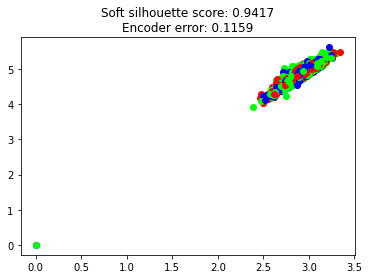

In [26]:
color1 = (0, 0, 1)
color2 = (0, 1, 0)
color3 = (1, 0 , 0)
color4 = (0, 1 , 1)
color5 = (1, 1, 0)
color6 = (1, 0, 1)
colors = [color1, color2, color3, color4, color5, color6, color1, color2, color3, color4, color5, color6]

X = torch.from_numpy(X_train).float()
y = net(X)
code = net.encode(X)
s = silhouette(code, y)
mse = nn.MSELoss()
rec = torch.abs(mse(net.decode(code),X))
x = code.detach().numpy()


for i in range(x.shape[0]):
    plt.scatter(x[i,0], x[i,1], color=colors[y_true[i]])
plt.title(f'Soft silhouette score: {s:.4f}\nEncoder error: {rec:.4f}')

In [10]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [11]:
X = torch.from_numpy(X_train).float()
X.requires_grad=True
y = net(X)
s = silhouette(X, y)
y = y.detach().numpy()
X = X.detach().numpy()



print(f'Neural Network - Clusters: {n_clusters} \n Purity Score: {purity_score(y_true, np.argmax(y, axis=-1)):.4f} \n NMI Score: {normalized_mutual_info_score(y_true, np.argmax(y, axis=-1)):.4f}\n Soft Silhuette Score: {s:.3f}')


Neural Network - Clusters: 3 
 Purity Score: 0.3333 
 NMI Score: 0.0000
 Soft Silhuette Score: 0.067


<ipython-input-7-0e8e01d5a061>:28: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  return F.softmin(self.fc5(x))


In [12]:
X = torch.from_numpy(X_train).float()
X.requires_grad=True

gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_train)
probabilities = gm.predict_proba(X_train)
s = silhouette(X, torch.from_numpy(probabilities).float())
print(f'Mixture Model - Clusters: {n_clusters} \n Purity Score: {purity_score(y_true, np.argmax(probabilities, axis=-1))} \n Soft Silhouette Score: {s} \n NMI Score: {normalized_mutual_info_score(y_true, np.argmax(probabilities, axis=-1))}')


Mixture Model - Clusters: 3 
 Purity Score: 0.3486666666666667 
 Soft Silhouette Score: 0.010085593909025192 
 NMI Score: 0.0008725319902370469


In [13]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train)
print(f'Mixture Model - Clusters: {n_clusters} \n Purity Score: {purity_score(y_true, kmeans.labels_)}')


Mixture Model - Clusters: 3 
 Purity Score: 0.35333333333333333
